In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *


done1
done2


## calculate ins1 and ins2 prediction for all samples based on countint and not modeling

In [ ]:
file1 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/exp_and_obs_freqs_ins1_dfs/AllinsSeqsDFsmall_ins1_comb'
AllnsSeqsDFsmall_ins1_comb = pd.read_pickle(file1)
file2 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/exp_and_obs_freqs_ins1_dfs/Alln1SeqsDFsmall'
AllnsSeqsDFsmall_ins1_seq = pd.read_pickle(file2)
file3 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/exp_and_obs_freqs_ins2_dfs/AllinsSeqsDFsmall_ins2_comb'  
AllnsSeqsDFsmall_ins2_comb = pd.read_pickle(file3)
file4 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/exp_and_obs_freqs_ins2_dfs/AllinsSeqsDFsmall_ins2_seq'
AllnsSeqsDFsmall_ins2_seq = pd.read_pickle(file4)

In [11]:
def insPredictionByCounts(sample_name, insType,basicUnit,count):
    
    from myplots import *
    print 'loading ins table...'
    if insType == 1 and basicUnit == 'comb':
        AllnsSeqsDFsmall = AllnsSeqsDFsmall_ins1_comb
    elif insType == 1 and basicUnit == 'seq':
        AllnsSeqsDFsmall = AllnsSeqsDFsmall_ins1_seq
    elif insType == 2 and basicUnit == 'comb':
        AllnsSeqsDFsmall = AllnsSeqsDFsmall_ins2_comb
    elif insType == 2 and basicUnit == 'seq':
        AllnsSeqsDFsmall = AllnsSeqsDFsmall_ins2_seq
    
    
    print 'calculating train and test sets....'
    shortSampleName = sample_name.replace("HIP", "")
    trainSet = AllnsSeqsDFsmall[AllnsSeqsDFsmall.index != shortSampleName]
    testSet = AllnsSeqsDFsmall[AllnsSeqsDFsmall.index == shortSampleName]


    print 'value counts...'
    sampleInsCounts=testSet['sequence'].value_counts(normalize=True)
    trainInsCounts=trainSet['sequence'].value_counts(normalize=True)


    print 'calculate correlations and plot...'
    insPredByCounts=pd.merge(pd.DataFrame(sampleInsCounts),pd.DataFrame(trainInsCounts), how='outer',left_index=True, right_index=True)
    #insPredByCounts=insPredByCounts.fillna(0)

    insPredByCounts['log sequence_x']=np.log10(insPredByCounts['sequence_x'])
    insPredByCounts['log sequence_y']=np.log10(insPredByCounts['sequence_y'])
    
    x=insPredByCounts['log sequence_x']
    y=insPredByCounts['log sequence_y']
    filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/SuffStat Images/Ins%s_Freq_corr_%s_vs_allOthers'

    fig,ax= plt.subplots(nrows=1,ncols=1, figsize=(6,6))
    plt.plot(x, y, marker='o', linestyle='', ms=6,alpha=0.4,color='blue')
    r,p=MyPearsonr(x,y)
    r=round(r,4)
    p=round(p,4)
    
    
    plt.xlabel('Observed frequency in sample')
    plt.ylabel('Observed frequency in all other samples')
    plt.title('Ins%s frequency correlation between sample %s and all other samples' %(insType, sample_name))

    plot_bestFitLine(x,y)
    plt.plot(x, x, 'k-', linewidth=0.5)
    #plt.xscale('log')
    #plt.yscale('log')
    

    
    
    appearValue=insPredByCounts['sequence_x'].min()
    #formattedAppearValue='%.10f' %appearValue
    print 'appearValue=%s' %appearValue
    #print 'formattedAppearValue=%s' %formattedAppearValue
    #roundAppearValue=10**(find_decimal_fold(formattedAppearValue)*-1)
    #print roundAppearValue
    nSeqInSample=len(insPredByCounts[insPredByCounts['sequence_x']!=0])
    notPredicted=insPredByCounts[(insPredByCounts['sequence_y']<appearValue)&(insPredByCounts['sequence_x']!=0)]
    
    percPred= round(100-(float(len(notPredicted))*100/nSeqInSample),4)
    
    #get locations for p-value text
    ylim=ax.get_ylim()
    ypos=ylim[1]
    xlim=ax.get_xlim()
    xpos=xlim[0]
    print xpos, ypos
    plt.text(xpos,ypos,"r=%s,p=%s,perc predicted=%s" %(r, p,percPred),  verticalalignment = 'top', ha = 'left',fontsize=14,color='red')
    
    if count<11:
        fig.savefig(filename=filename, dpi=200)
        plt.show()
    
    return r,p,percPred

<ipython-input-11-17abffcd27a0>:1: SyntaxWarning: import * only allowed at module level
  def insPredictionByCounts(sample_name, insType,basicUnit,count):


getting list of samples that have dfs...
finished getting list of samples that have dfs
1 HIP11513 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.59190041071e-05
-5.0 1.0


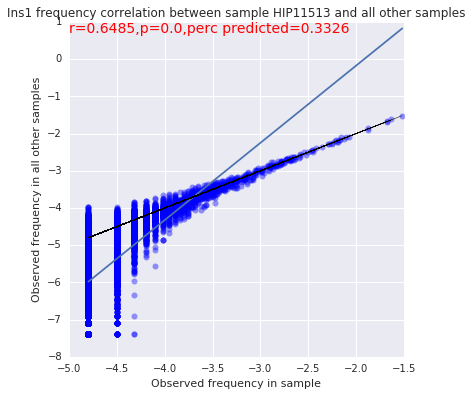

2 HIP11513 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.67819023965e-05
-5.0 1.0


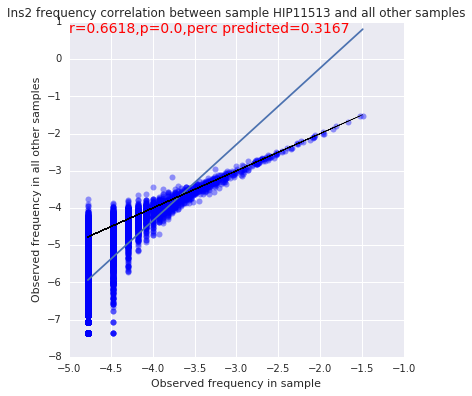

3 HIP08200 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.36711673794e-05
-4.5 1.0


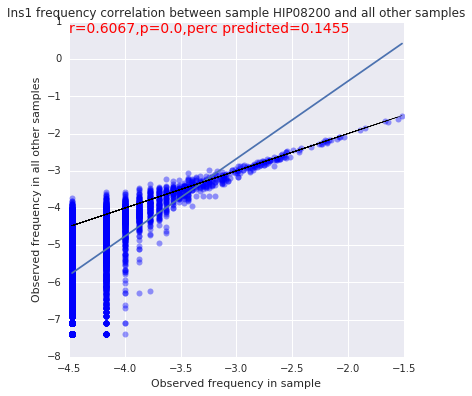

4 HIP08200 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.63623140977e-05
-4.5 1.0


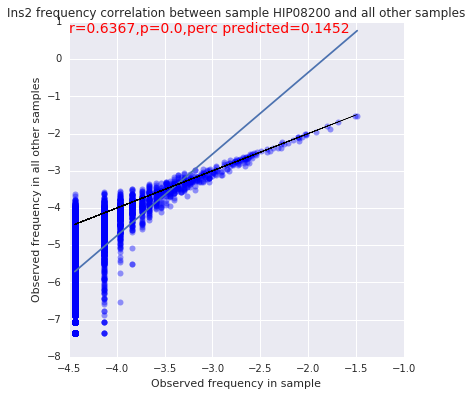

5 HIP00769 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.15826043016e-05
-5.0 1.0


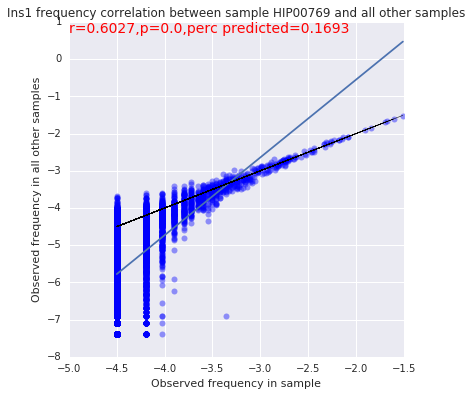

6 HIP00769 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.35559209423e-05
-4.5 1.0


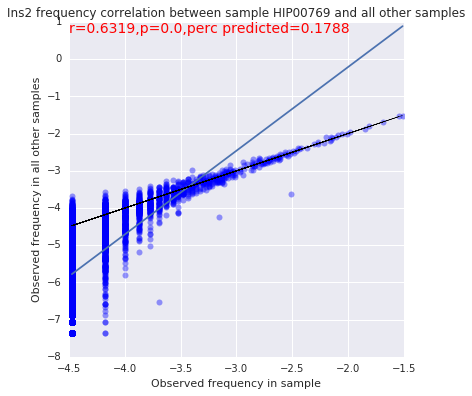

7 HIP09122 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.08159866778e-05
-5.0 1.0


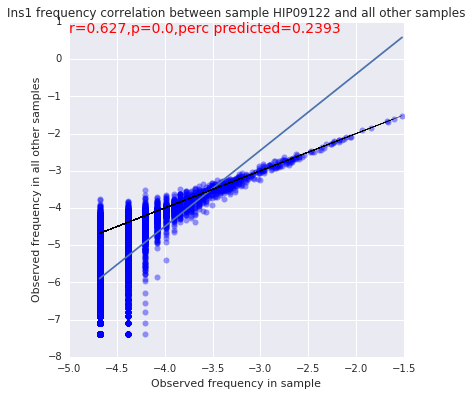

8 HIP09122 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.21552640907e-05
-5.0 1.0


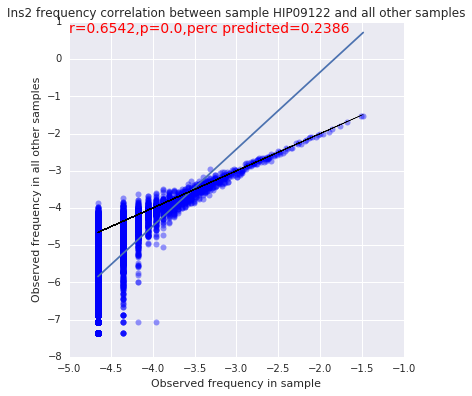

9 HIP12091 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.71968457075e-05
-4.5 1.0


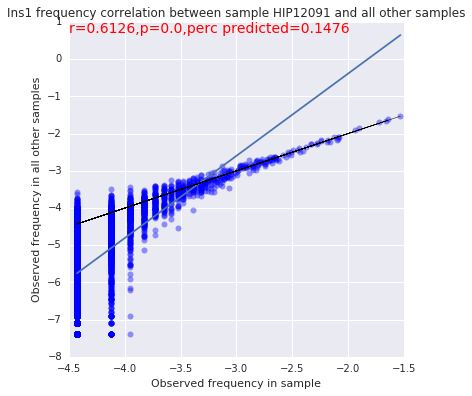

10 HIP12091 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.91665361115e-05
-4.5 1.0


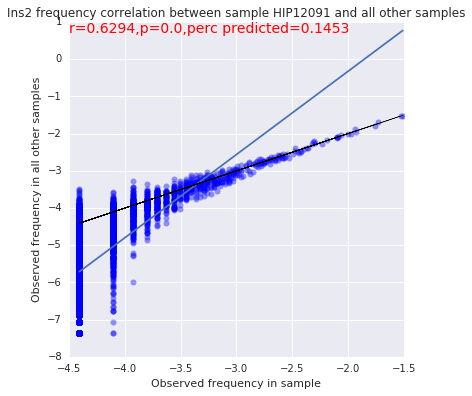

11 HIP13710 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.76531855173e-05
-5.0 1.0
12 HIP13710 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.88579618315e-05
-5.0 1.0
13 HIP13789 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.60003640051e-05
-5.0 1.0
14 HIP13789 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.75088028169e-05
-5.0 1.0
15 HIP02947 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.41428712857e-05
-5.0 1.0
16 HIP02947 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.48955819704e-05
-5.0 1.0
17 HIP0373

/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


appearValue=3.94773202795e-05
-4.5 1.0
32 HIP11717 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=4.21691827612e-05
-4.5 1.0
33 HIP11784 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=5.4045289953e-05
-4.5 1.0
34 HIP11784 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=5.73855158958e-05
-4.5 1.0
35 HIP02663 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.32612672543e-05
-4.5 1.0
36 HIP02663 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.51864883885e-05
-4.5 1.0
37 HIP13939 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue

value counts...
calculate correlations and plot...
appearValue=5.60726701806e-05
-4.5 1.0
82 HIP01181 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=5.94000594001e-05
-4.5 1.0
83 HIP00707 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.96234854993e-05
-5.0 1.0
84 HIP00707 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.14415972331e-05
-5.0 1.0
85 HIP14127 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.90149426955e-05
-5.0 1.0
86 HIP14127 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.0711587482e-05
-5.0 1.0
87 HIP13703 1 seq
loading ins table...
calculating train and test sets....
value count

131 HIP13981 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.84754257076e-05
-5.0 1.0
132 HIP13981 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.01695528872e-05
-5.0 1.0
133 HIP10564 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.06880255324e-05
-5.0 1.0
134 HIP10564 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.26808065623e-05
-4.5 1.0
135 HIP05551 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.53257029815e-05
-4.5 1.0
136 HIP05551 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.78716152244e-05
-4.5 1.0
137 

value counts...
calculate correlations and plot...
appearValue=1.97476253481e-05
-5.0 1.0
181 HIP09235 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.74280698867e-05
-5.0 1.0
182 HIP09235 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.93453062183e-05
-5.0 1.0
183 HIP14223 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.98883127244e-05
-4.5 1.0
184 HIP14223 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=4.2322668021e-05
-4.5 1.0
185 HIP11774 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=5.15304544986e-05
-4.5 1.0
186 HIP11774 2 seq
loading ins table...
calculating train and test sets....
value

-5.0 1.0
230 HIP13265 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.32362673726e-05
-5.0 1.0
231 HIP03677 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.58586675548e-05
-5.0 1.0
232 HIP03677 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.68884685537e-05
-5.0 1.0
233 HIP16738 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.86971804652e-05
-5.0 1.0
234 HIP16738 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.01174861189e-05
-5.0 1.0
235 HIP08345 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.3421397789e-05
-5.0 

value counts...
calculate correlations and plot...
appearValue=7.01557457556e-05
-4.5 1.0
280 HIP13760 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=7.8480615288e-05
-4.5 1.0
281 HIP10746 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=5.30644733351e-05
-4.5 1.0
282 HIP10746 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=5.59597090095e-05
-4.5 1.0
283 HIP13350 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.55427841635e-05
-5.0 1.0
284 HIP13350 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.71134970989e-05
-5.0 1.0
285 HIP12538 1 seq
loading ins table...
calculating train and test sets....
value

-5.0 1.0
329 HIP10823 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.36804091975e-05
-5.0 1.0
330 HIP10823 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.5190820465e-05
-5.0 1.0
331 HIP01797 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.05166468308e-05
-5.0 1.0
332 HIP01797 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.23687447401e-05
-4.5 1.0
333 HIP17760 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.44881966892e-05
-5.0 1.0
334 HIP17760 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.59571706684e-05
-5.0 

calculate correlations and plot...
appearValue=2.8144437252e-05
-5.0 1.0
379 HIP10726 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.50042005041e-05
-4.5 1.0
380 HIP10726 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.69439929068e-05
-4.5 1.0
381 HIP13777 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.93169158605e-05
-5.0 1.0
382 HIP13777 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.11012969241e-05
-5.0 1.0
383 HIP00773 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.30833540486e-05
-5.0 1.0
384 HIP00773 2 seq
loading ins table...
calculating train and test sets....
value counts...
calcu

-4.5 1.0
428 HIP13961 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=4.16215766253e-05
-4.5 1.0
429 HIP13916 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.78028957018e-05
-4.5 0.0
430 HIP13916 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=4.53967677501e-05
-4.5 0.0
431 HIP14218 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.60851871512e-05
-5.0 1.0
432 HIP14218 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.70042000374e-05
-5.0 1.0
433 HIP13198 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=4.41891294741e-05
-4.5

value counts...
calculate correlations and plot...
appearValue=9.28936367859e-05
-4.5 1.0
478 HIP10694 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=9.70968055151e-05
-4.5 1.0
479 HIP12034 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.00202408866e-05
-5.0 1.0
480 HIP12034 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.0631059704e-05
-5.0 1.0
481 HIP13361 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.06072477963e-05
-5.0 1.0
482 HIP13361 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.24412003244e-05
-4.5 1.0
483 HIP09559 1 seq
loading ins table...
calculating train and test sets....
value

-5.0 1.0
527 HIP13324 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.94106914088e-05
-5.0 1.0
528 HIP13324 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.08355036983e-05
-5.0 1.0
529 HIP14494 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.11243367114e-05
-5.0 1.0
530 HIP14494 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.18173975727e-05
-5.0 1.0
531 HIP13769 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.06946192332e-05
-5.0 1.0
532 HIP13769 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.2605151614e-05
-4.5 

calculate correlations and plot...
appearValue=1.22106085767e-05
-5.0 1.0
577 HIP01798 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.11483557153e-05
-5.0 1.0
578 HIP01798 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.24567707164e-05
-5.0 1.0
579 HIP08400 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.28461766923e-05
-5.0 1.0
580 HIP08400 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.45134088346e-05
-5.0 1.0
581 HIP08499 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.74161412797e-05
-5.0 1.0
582 HIP08499 2 seq
loading ins table...
calculating train and test sets....
value counts...
calc

-5.0 1.0
626 HIP09029 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.71957217044e-05
-5.0 1.0
627 HIP17454 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.05909605683e-05
-5.0 1.0
628 HIP17454 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.18373987291e-05
-5.0 1.0
629 HIP12097 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.00908104633e-05
-5.0 1.0
630 HIP12097 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.13042459362e-05
-5.0 1.0
631 HIP13256 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.88001843212e-05
-5.0

value counts...
calculate correlations and plot...
appearValue=1.50405342398e-05
-5.0 1.0
676 HIP13951 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.58914297519e-05
-5.0 1.0
677 HIP00825 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.42704245451e-05
-5.0 1.0
678 HIP00825 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.51881046764e-05
-5.0 1.0
679 HIP05838 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.89214758751e-05
-5.0 1.0
680 HIP05838 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.99760287655e-05
-5.0 1.0
681 HIP13856 1 seq
loading ins table...
calculating train and test sets....
valu

-5.0 1.0
725 HIP14064 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.46062992126e-05
-5.0 1.0
726 HIP14064 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.5964584307e-05
-5.0 1.0
727 HIP04498 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.69546125023e-05
-5.0 1.0
728 HIP04498 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.81798349271e-05
-5.0 1.0
729 HIP00734 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=4.27862399452e-05
-4.5 1.0
730 HIP00734 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=4.56058740366e-05
-4.5 

value counts...
calculate correlations and plot...
appearValue=3.91634683168e-05
-4.5 1.0
775 HIP14148 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.33726773402e-05
-5.0 1.0
776 HIP14148 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.46998962604e-05
-5.0 1.0
777 HIP02126 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.01959002323e-05
-5.0 1.0
778 HIP02126 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.13006155878e-05
-5.0 1.0
779 HIP12980 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.57891479266e-05
-5.0 1.0
780 HIP12980 2 seq
loading ins table...
calculating train and test sets....
valu

-4.5 1.0
824 HIP13263 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=4.1675349031e-05
-4.5 1.0
825 HIP13214 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.82355301069e-05
-5.0 1.0
826 HIP13214 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.9436345967e-05
-5.0 1.0
827 HIP10602 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.80662363177e-05
-5.0 1.0
828 HIP10602 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.94602875324e-05
-5.0 1.0
829 HIP02873 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.84195867792e-05
-5.0 1

value counts...
calculate correlations and plot...
appearValue=6.63746183459e-05
-4.5 1.0
874 HIP09366 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=7.07814269536e-05
-4.5 1.0
875 HIP13809 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=5.06868062243e-05
-4.5 1.0
876 HIP13809 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=5.3367488526e-05
-4.5 1.0
877 HIP10408 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.70273629723e-05
-5.0 1.0
878 HIP10408 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.82013432591e-05
-5.0 1.0
879 HIP05960 1 seq
loading ins table...
calculating train and test sets....
value

-5.0 1.0
923 HIP14238 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.77323828776e-05
-5.0 1.0
924 HIP14238 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.89304306673e-05
-5.0 1.0
925 HIP17723 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.27811190086e-05
-5.0 1.0
926 HIP17723 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.43593491182e-05
-5.0 1.0
927 HIP13511 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.13092396863e-05
-5.0 1.0
928 HIP13511 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.24300742435e-05
-5.0

value counts...
calculate correlations and plot...
appearValue=2.48299150817e-05
-5.0 1.0
973 HIP13771 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.0446034404e-05
-5.0 1.0
974 HIP13771 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.22050819619e-05
-4.5 1.0
975 HIP17534 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.86563683513e-05
-5.0 1.0
976 HIP17534 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.98208197891e-05
-5.0 1.0
977 HIP17887 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.98623346373e-05
-5.0 1.0
978 HIP17887 2 seq
loading ins table...
calculating train and test sets....
value

appearValue=3.11993011357e-05
-5.0 1.0
1022 HIP14226 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.30250990753e-05
-4.5 1.0
1023 HIP00926 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.44833079875e-05
-5.0 1.0
1024 HIP00926 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.5353436099e-05
-5.0 1.0
1025 HIP05561 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.99257840555e-05
-5.0 1.0
1026 HIP05561 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.12012480499e-05
-5.0 1.0
1027 HIP05841 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...

-4.5 1.0
1071 HIP14214 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.54673254215e-05
-5.0 1.0
1072 HIP14214 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.67393978288e-05
-5.0 1.0
1073 HIP13303 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.4870672503e-05
-5.0 1.0
1074 HIP13303 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.64592263322e-05
-5.0 1.0
1075 HIP14160 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.53919660237e-05
-4.5 1.0
1076 HIP14160 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.77372731046e-05

value counts...
calculate correlations and plot...
appearValue=3.02398016269e-05
-5.0 1.0
1121 HIP08305 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.51768674941e-05
-5.0 1.0
1122 HIP08305 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.68197178566e-05
-5.0 1.0
1123 HIP00761 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.40982712176e-05
-4.5 1.0
1124 HIP00761 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=3.66166239473e-05
-4.5 1.0
1125 HIP13355 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.41878183392e-05
-5.0 1.0
1126 HIP13355 2 seq
loading ins table...
calculating train and test sets...

appearValue=2.37535333381e-05
-5.0 1.0
1170 HIP13720 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.56154102308e-05
-5.0 1.0
1171 HIP17845 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.5135732958e-05
-5.0 1.0
1172 HIP17845 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=2.68125268125e-05
-5.0 1.0
1173 HIP09062 1 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.59220456644e-05
-5.0 1.0
1174 HIP09062 2 seq
loading ins table...
calculating train and test sets....
value counts...
calculate correlations and plot...
appearValue=1.6835016835e-05
-5.0 1.0


In [14]:
df_file_names,samples_with_df=get_sample_with_dfs()
insType_List = [1, 2]
basicUnit='seq'


count=1
for sample_name in samples_with_df:
    for insType in insType_List:
        print count, sample_name,insType, basicUnit
        r,p,percPred=insPredictionByCounts(sample_name=sample_name, insType=insType,basicUnit=basicUnit,count=count)
        insPredictionByCountsDF = pd.DataFrame()
        insPredictionByCountsDF.loc[1,'Sample']= sample_name
        insPredictionByCountsDF.loc[1,'basicUnit']= basicUnit
        insPredictionByCountsDF.loc[1,'addPrior']= 'NoPrior'
        insPredictionByCountsDF.loc[1,'insType']= insType
        insPredictionByCountsDF.loc[1,'capping']= 'NoCapping'
        insPredictionByCountsDF.loc[1,'Trim']= 'NoTrimming'
        insPredictionByCountsDF.loc[1,'expected to observed frequency correlation r']= r
        insPredictionByCountsDF.loc[1,'expected to observed frequency correlation p']= p
        insPredictionByCountsDF.loc[1,'perc_predicted_to_appear']= percPred
        filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1Ins2PredByCount/DFs/insPredictionByCountsDF_%s_%s' %(sample_name,insType)
        insPredictionByCountsDF.to_pickle(filename)
        count=count+1
        
        

In [15]:
# concatenate all dfs resulting from optimization runs:

dfs_folder='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1Ins2PredByCount/DFs'
insPredictionByCountsDF=concat_summarizing_dfs(dfs_folder)

number of dfs in directory: 1174
the length of df list is 1174


In [16]:
insPredictionByCountsDF.head()

,Sample,basicUnit,addPrior,insType,capping,Trim,expected to observed frequency correlation r,expected to observed frequency correlation p,perc_predicted_to_appear
1,HIP14127,seq,NoPrior,2.0,NoCapping,NoTrimming,0.6370,0.0,0.2012
1,HIP14034,seq,NoPrior,2.0,NoCapping,NoTrimming,0.6576,0.0,0.3013
1,HIP10408,seq,NoPrior,1.0,NoCapping,NoTrimming,0.6384,0.0,0.2756
1,HIP01181,seq,NoPrior,2.0,NoCapping,NoTrimming,0.6117,0.0,0.0979
1,HIP13933,seq,NoPrior,2.0,NoCapping,NoTrimming,0.6352,0.0,0.1384


In [19]:
insPredictionByCountsDF.groupby('insType').mean()

,expected to observed frequency correlation r,expected to observed frequency correlation p,perc_predicted_to_appear
insType,,,
1.0,0.619433,0.0,0.216824
2.0,0.639897,0.0,0.218319


In [20]:
file1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/SuffStat/Ins1Ins2PredByCount/insPredictionByCountsDF'
insPredictionByCountsDF.to_pickle(file1)

In [23]:
insPredictionByCountsDF.groupby('insType').mean()

,expected to observed frequency correlation r,expected to observed frequency correlation p,perc_predicted_to_appear
insType,,,
1.0,0.619433,0.0,0.216824
2.0,0.639897,0.0,0.218319
